In [4]:
from regelum.policy import Policy
from regelum.system import KinematicPoint
from regelum.utils import rg
from regelum.scenario import Scenario
from regelum.simulator import CasADi
from regelum.callback import (
    ScenarioStepLogger,
    HistoricalDataCallback,
)
from regelum import set_jupyter_env
%matplotlib inline

In [5]:
callbacks = [ScenarioStepLogger, HistoricalDataCallback]
ScenarioStepLogger.cooldown = 0.1
callbacks = set_jupyter_env(callbacks=callbacks, interactive=True)

In [6]:
class SimplePolicy(Policy):
    def __init__(self, system=KinematicPoint(), gain=0.2):
        super().__init__(system=system)
        self.gain = gain

    def get_action(self, observation):
        return -self.gain * observation


policy = SimplePolicy()
system = KinematicPoint()

In [7]:
simulator = CasADi(
    system=system,
    state_init=rg.array([-10, 10]),
)

scenario = Scenario(
    policy=policy,
    simulator=simulator,
    sampling_time=0.01,
    N_episodes=1,
    N_iterations=1,
)

In [8]:
scenario.run()

[21:31:53] INFO     runn. objective: 0.00, state est.: [-10  10], observation: [-10  10], action:  ]8;id=906157;file:///mnt/md0/rcognita/regelum/callback.py\callback.py]8;;\:]8;id=262680;file:///mnt/md0/rcognita/regelum/callback.py#1095\1095]8;;\
                    [ 2. -2.], value: 0.0000, time: 0.0000 (0.0%), episode: 1/1, iteration: 1/1                    

           INFO     runn. objective: 0.00, state est.: [-9.53  9.53], observation: [-9.53  9.53],  ]8;id=142581;file:///mnt/md0/rcognita/regelum/callback.py\callback.py]8;;\:]8;id=748501;file:///mnt/md0/rcognita/regelum/callback.py#1095\1095]8;;\
                    action: [ 1.91 -1.91], value: 0.0000, time: 0.2400 (24.0%), episode: 1/1,                      
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 0.00, state est.: [-8.9  8.9], observation: [-8.9  8.9],      ]8;id=301825;file:///mnt/md0/rcognita/regelum/callback.py\callback.py]8;;\:]8;id=387938;file:///mnt/md0/rcognita/regelum/callback.py#1095\1095]8;;\
                    action: [ 1.78 -1.78], value: 0.0000, time: 0.5800 (58.0%), episode: 1/1,                      
                    iteration: 1/1                                                                                 

[21:31:54] INFO     runn. objective: 0.00, state est.: [-8.33  8.33], observation: [-8.33  8.33],  ]8;id=544576;file:///mnt/md0/rcognita/regelum/callback.py\callback.py]8;;\:]8;id=759423;file:///mnt/md0/rcognita/regelum/callback.py#1095\1095]8;;\
                    action: [ 1.67 -1.67], value: 0.0000, time: 0.9100 (91.0%), episode: 1/1,                      
                    iteration: 1/1                                                                                 

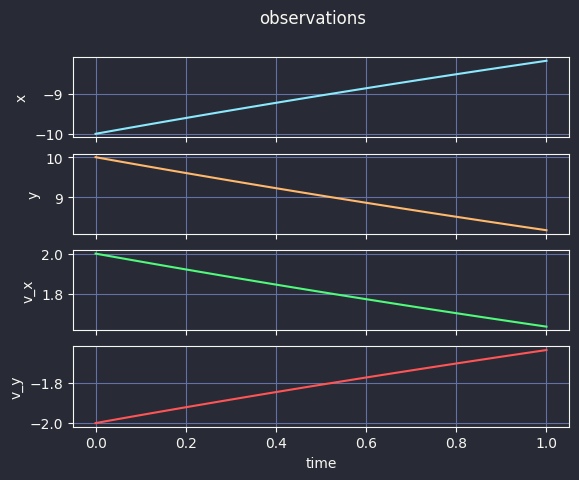

In [10]:
callbacks[1].plot(name="observations")